In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_excel("103_upset (around 21000 points).xls", header= 3)
df.head(6)

,Time,,Flow,Flow.1,Flow.2,Flow.3,Flow.4,Flow.5,Press,Press.1,...,Press.4,Press.5,Press.6,Press.7,Temp,Temp.1,Temp.2,Temp.3,Temp.4,oxygen
0,NaN,NaN,BFW,BFW,Steam,Steam,Fuel gas,Air,FD disch,Fuel gas,...,ignitor,steam drm,steam drm,flue gas,Dertor,steam drm,super,super,flue gas,%
1,NaN,,92fi300.pv,92fy300.pv,92fi301.pv,92fi301.pv,92fi305.pv,92fi302.pv,92pi317.pv,92pi311.pv,...,92pi324.pv,92pi307.pv,92pi301.pv,92pi300.pv,93ti211.pv,92ti300a.pv,92ti300b.pv,92ti311.pv,92ti300.pv,92ai300.pv
2,NaN,2008-06-21 07:00:00,355.848491,355.234993,352.095325,352.095325,401.596232,1.12351,9.716322,7.576174,...,7.780427,628.271028,649.402659,0.310961,298.276672,597.732324,760.399808,765.36439,335.989723,2.05269
3,NaN,2008-06-21 07:00:01,355.877026,355.345775,354.608066,354.608066,401.471854,1.111719,9.716363,7.576189,...,7.780427,628.270974,649.402513,0.310964,298.276689,597.732295,760.399987,765.36489,335.989571,2.030534
4,NaN,2008-06-21 07:00:02,355.90556,355.456557,356.111179,356.111179,401.347476,1.099927,9.716405,7.576205,...,7.780427,628.270921,649.402367,0.310968,298.276707,597.732267,760.400165,765.36539,335.989419,2.018448
5,NaN,2008-06-21 07:00:03,355.934095,355.567339,356.604663,356.604663,401.223098,1.088136,9.716447,7.57622,...,7.780428,628.270868,649.402221,0.310972,298.276724,597.732239,760.400343,765.36589,335.989267,2.016434


# DATA Preprocessing


In [3]:
#Droping First colmun and First two rows
df=df.drop([0,1], axis=0)
df = df.drop(df.iloc[:,0:1],axis = 1)

In [4]:
colWithTime=['Time','Flow BFW/ 92fi300.pv', 'Flow BFW/92fy300.pv','Flow Steam/92fi301.pv', 'Flow Steam/92fi301.pv.1', 'Flow Fuel gas/92fi305.pv', 'Flow Air/92fi302.pv', 'Press FD disch/92pi317.pv', 'Press Fuel gas/92pi311.pv', 'Press Fuel gas/92pi304.pv', 'Press furnce/92pi306.pv', 'Press ignitor /92pi324.pv','Press steam drm/92pi307.pv', 'Press steam drm/92pi301.pv','Press flue gas/92pi300.pv','Temp Dertor /93ti211.pv','Temp steam drm/92ti300a.pv','Temp super/92ti300b.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv']
df.columns = colWithTime
col=['Flow BFW/ 92fi300.pv', 'Flow BFW/92fy300.pv','Flow Steam/92fi301.pv', 'Flow Steam/92fi301.pv.1', 'Flow Fuel gas/92fi305.pv', 'Flow Air/92fi302.pv', 'Press FD disch/92pi317.pv', 'Press Fuel gas/92pi311.pv', 'Press Fuel gas/92pi304.pv', 'Press furnce/92pi306.pv', 'Press ignitor /92pi324.pv','Press steam drm/92pi307.pv', 'Press steam drm/92pi301.pv','Press flue gas/92pi300.pv','Temp Dertor /93ti211.pv','Temp steam drm/92ti300a.pv','Temp super/92ti300b.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv']
df[col] = df[col].apply(pd.to_numeric, errors= 'coerce', downcast= 'float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 2 to 21601
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        21600 non-null  object 
 1   Flow BFW/ 92fi300.pv        21510 non-null  float32
 2   Flow BFW/92fy300.pv         21582 non-null  float32
 3   Flow Steam/92fi301.pv       21582 non-null  float32
 4   Flow Steam/92fi301.pv.1     21582 non-null  float32
 5   Flow Fuel gas/92fi305.pv    21582 non-null  float32
 6   Flow Air/92fi302.pv         21582 non-null  float32
 7   Press FD disch/92pi317.pv   21582 non-null  float32
 8   Press Fuel gas/92pi311.pv   21582 non-null  float32
 9   Press Fuel gas/92pi304.pv   21582 non-null  float32
 10  Press furnce/92pi306.pv     21582 non-null  float32
 11  Press ignitor /92pi324.pv   21582 non-null  float32
 12  Press steam drm/92pi307.pv  21582 non-null  float32
 13  Press steam drm/92pi301.pv  215

In [5]:
df['Time']= df['Time'].apply(pd.to_datetime ,errors= 'coerce' )

In [6]:
df['Press flue gas/92pi300.pv']= df['Press flue gas/92pi300.pv'].fillna(df['Press flue gas/92pi300.pv'].mean())
df['Press flue gas/92pi300.pv'].describe()

count    21600.000000
mean         0.335788
std          0.032409
min          0.276383
25%          0.308812
50%          0.335786
75%          0.361206
max          0.418377
Name: Press flue gas/92pi300.pv, dtype: float64

In [7]:
#dropping 106 null rows
df = df.dropna()

In [8]:
# this is duplicated column 
df = df.drop('Flow Steam/92fi301.pv.1', axis=1)

C:\Users\m7md1\AppData\Local\Temp\ipykernel_4656\293815560.py:4: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
C:\Users\m7md1\AppData\Local\Temp\ipykernel_4656\293815560.py:7: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


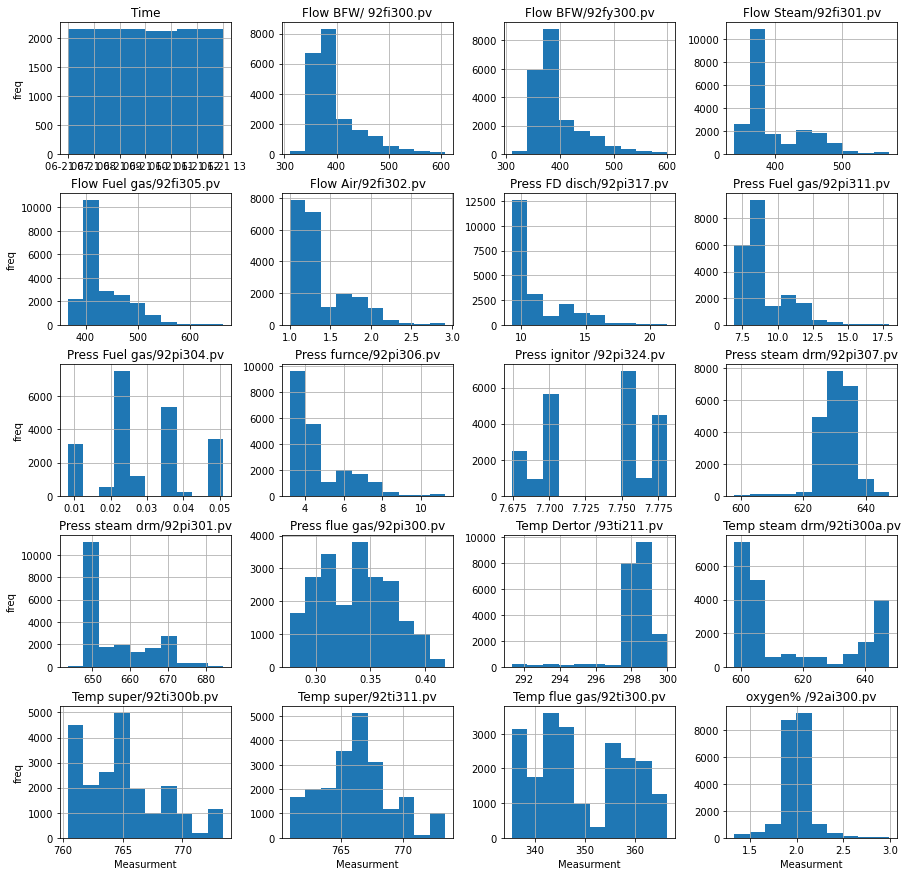

In [9]:
# Features distrubitons 
axlist = df.hist(figsize=(15,15), bins= 10)
for ax in axlist.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Measurment')
        
    if ax.is_first_col():
        ax.set_ylabel("freq")

In [10]:
# r= df.loc[(df['Press flue gas/92pi300.pv'] ==df['Press flue gas/92pi300.pv'])]
# g= r.index
# df.loc[g]

In [11]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

def maxMape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.max(np.abs((y_test - pred) / y_test))
    return mape

In [12]:
dfd = df

# Press Flue gas/92pi304.pv as single variable LSTM Model :


In [58]:
# Input output
PFG = dfd.drop(['Time','Flow BFW/92fy300.pv','Press flue gas/92pi300.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv','Press Fuel gas/92pi304.pv'], axis=1)
display(PFG.shape)
display(PFG.head())

(21494, 13)

,Flow BFW/ 92fi300.pv,Flow Steam/92fi301.pv,Flow Fuel gas/92fi305.pv,Flow Air/92fi302.pv,Press FD disch/92pi317.pv,Press Fuel gas/92pi311.pv,Press furnce/92pi306.pv,Press ignitor /92pi324.pv,Press steam drm/92pi307.pv,Press steam drm/92pi301.pv,Temp Dertor /93ti211.pv,Temp steam drm/92ti300a.pv,Temp super/92ti300b.pv
2,355.848480,352.095337,401.596222,1.123510,9.716322,7.576174,3.716083,7.780427,628.271057,649.402649,298.276672,597.732300,760.399780
3,355.877014,354.608063,401.471863,1.111719,9.716364,7.576190,3.716082,7.780427,628.270996,649.402527,298.276703,597.732300,760.399963
4,355.905548,356.111176,401.347473,1.099927,9.716405,7.576205,3.716082,7.780427,628.270935,649.402344,298.276703,597.732239,760.400146
5,355.934082,356.604675,401.223083,1.088136,9.716447,7.576221,3.716082,7.780428,628.270874,649.402222,298.276733,597.732239,760.400330
6,355.962616,355.491791,401.098724,1.083197,9.716489,7.576236,3.716081,7.780428,628.270813,649.402100,298.276733,597.732239,760.400513


In [59]:
ypf= dfd['Press Fuel gas/92pi304.pv']
ypf= ypf.to_numpy()
ypf= ypf.reshape(-1,1)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [61]:
s =StandardScaler()
s2 =StandardScaler()
s= s.fit(PFG)
s2= s2.fit(ypf)
PFG= s.transform(PFG)
ypf=s2.transform(ypf) 
PFG = pd.DataFrame(PFG)
display(PFG)
PFG['13'] = ypf
PFG= PFG.to_numpy()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.881462,-0.999050,-0.776282,-0.779350,-0.764965,-0.809909,-0.771072,1.217451,-0.358230,-0.905880,-0.047448,-0.973408,-1.390833
1,-0.880833,-0.943088,-0.779142,-0.815262,-0.764946,-0.809900,-0.771072,1.217451,-0.358241,-0.905895,-0.047423,-0.973408,-1.390778
2,-0.880204,-0.909611,-0.782002,-0.851174,-0.764926,-0.809891,-0.771073,1.217464,-0.358253,-0.905917,-0.047423,-0.973411,-1.390723
3,-0.879576,-0.898620,-0.784863,-0.887086,-0.764907,-0.809881,-0.771073,1.217476,-0.358265,-0.905932,-0.047398,-0.973411,-1.390667
4,-0.878947,-0.923406,-0.787723,-0.902129,-0.764887,-0.809872,-0.771073,1.217476,-0.358276,-0.905946,-0.047398,-0.973411,-1.390612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,-0.880459,-0.927443,-1.165967,-0.914692,-0.790225,-1.214776,-0.963373,-1.573244,0.586716,0.075055,1.360455,-0.539765,1.054487
21490,-0.886533,-0.939667,-1.169982,-0.899845,-0.790475,-1.214778,-0.963303,-1.573244,0.586623,0.074886,1.360455,-0.540257,1.054321
21491,-0.892608,-0.890097,-1.183783,-0.894563,-0.790725,-1.214779,-0.963234,-1.573244,0.586531,0.074724,1.360455,-0.540749,1.054136
21492,-0.898682,-0.900414,-1.179517,-0.889280,-0.790974,-1.214781,-0.963164,-1.573244,0.586450,0.074554,1.360455,-0.541238,1.053970


In [62]:
X= []
y= []
n1= 1
n2= 5
for i in range(n2, len(PFG)-n1 + 1):
    X.append(PFG[i-n2 : i, 0: PFG.shape[1]])
    y.append(PFG[i+n1-1:i+n1,13])

In [63]:
X, y =np.array(X), np.array(y)
X.shape , y.shape

((21489, 5, 14), (21489, 1))

In [64]:
indecies = np.array([i for i in range(21489)])
X_train, X_test, y_train, y_test, indtr,indts = train_test_split(X,y,indecies, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [65]:
#Original test set
orig_y= dfd['Press Fuel gas/92pi304.pv'].iloc[indts]

In [66]:
model1 = Sequential()
model1.add(InputLayer((5, 14)))
model1.add(LSTM(64))
model1.add(Dense(32, 'relu')) # Activate this cell for 4 Layers model
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                20224     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 22,577
Trainable params: 22,577
Non-trainable params: 0
_________________________________________________________________


In [67]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [68]:
train= model1.fit(X_train, y_train, validation_data=(X_val, y_val),verbose=1, epochs=20)

Epoch 1/20
430/430 [==============================] - 9s 9ms/step - loss: 0.1916 - root_mean_squared_error: 0.4377 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1209
Epoch 2/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0062 - root_mean_squared_error: 0.0789 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 3/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0025 - root_mean_squared_error: 0.0499 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0388
Epoch 4/20
430/430 [==============================] - 3s 7ms/step - loss: 0.0017 - root_mean_squared_error: 0.0407 - val_loss: 9.7593e-04 - val_root_mean_squared_error: 0.0312
Epoch 5/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0012 - root_mean_squared_error: 0.0351 - val_loss: 6.5417e-04 - val_root_mean_squared_error: 0.0256
Epoch 6/20
430/430 [==============================] - 3s 7ms/step - loss: 9.7589e-04 - root_mean_squared_error: 0.0312 - val_loss: 4

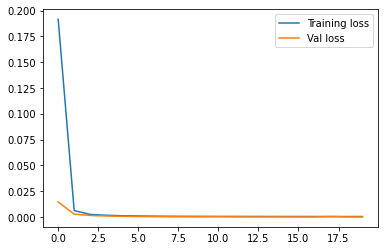

In [69]:
plt.plot(train.history['loss'], label= 'Training loss')
plt.plot(train.history['val_loss'], label= 'Val loss')
plt.legend()

<!-- # 3 layers
![image.png](attachment:image.png), ![image-2.png](attachment:image-2.png)

# 4 layers
![image-4.png](attachment:image-4.png), ![image-3.png](attachment:image-3.png)  -->

In [70]:
test_predictions = model1.predict(X_test).flatten()
y_test = y_test.flatten()

135/135 [==============================] - 1s 3ms/step


In [71]:
print(F"The MAPE value of Press Fuel gas/92pi304 {mape(y_test,test_predictions)}")
print(F"The Max MAPE value of Press Fuel gas/92pi304 {maxMape(y_test,test_predictions)}")

The MAPE value of Press Fuel gas/92pi304 0.008509881794452667
The Max MAPE value of oxygen% 1.207607388496399


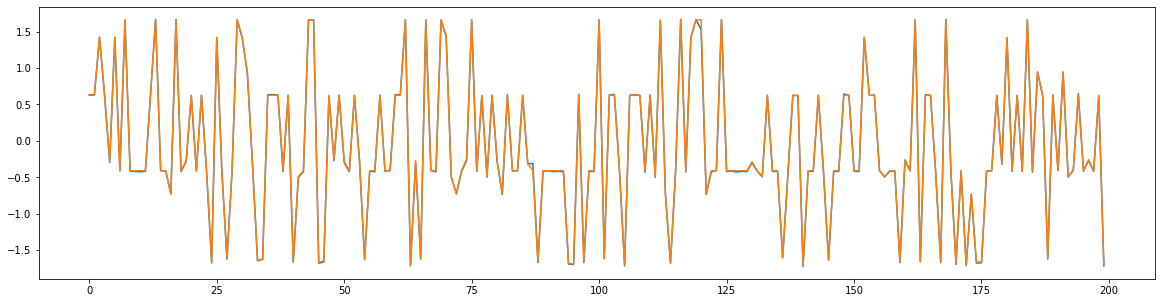

In [111]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(test_predictions[:200])
plt.plot(y_test[:200])

# 3 layers
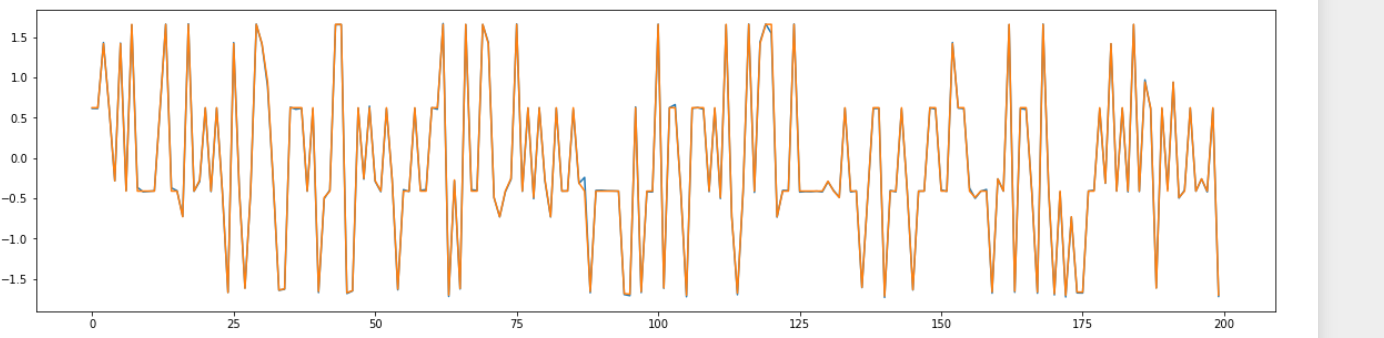

# 4 layers
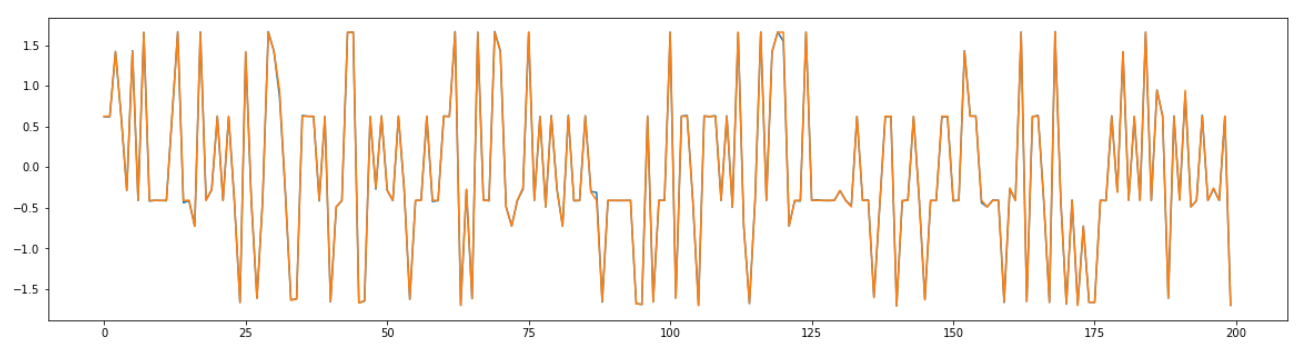

In [112]:
# y_inv=np.array([test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions])
y_inv = np.array(test_predictions)
y_inv= pd.DataFrame(y_inv.transpose())
y_inv= s2.inverse_transform(y_inv)
pd.DataFrame(y_inv)

,0
0,0.037930
1,0.037976
2,0.047955
3,0.037805
4,0.026198
...,...
4293,0.023625
4294,0.024719
4295,0.009114
4296,0.037836


In [113]:
orig_y= orig_y.to_numpy()

In [114]:
from sklearn.metrics import mean_squared_error as mse

The mean squared error=  2.7023816e-08


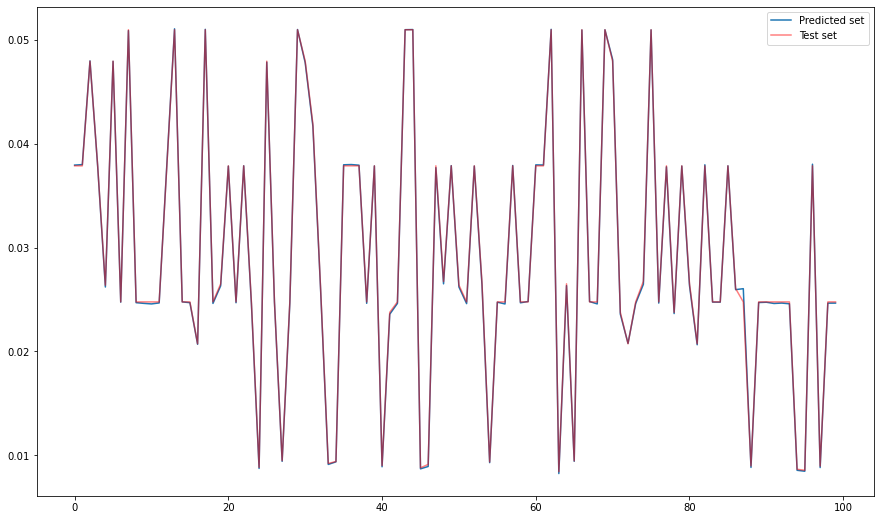

In [115]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(9)
plt.plot(y_inv[:100], label= 'Predicted set')
plt.plot(orig_y[:100],color='r', label= 'Test set', alpha=0.5)
plt.legend()
print('The mean squared error= ',mse(y_inv,orig_y))

# Press Flue gas/92pi300.pv as single variable LSTM Model :


In [45]:
# Input output
P2 = dfd.drop(['Time','Flow BFW/92fy300.pv','Press flue gas/92pi300.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv','Press Fuel gas/92pi304.pv'], axis=1)
P2.shape

(21494, 13)

In [46]:
y300= dfd['Press flue gas/92pi300.pv']
y300= y300.to_numpy()
y300= y300.reshape(-1,1)

In [47]:
ss =StandardScaler()
ss2 =StandardScaler()
ss= ss.fit(P2)
ss2= ss2.fit(y300)
P2= ss.transform(P2)
y300=ss2.transform(y300) 
P2 = pd.DataFrame(P2)
P2['13'] = y300
P2= P2.to_numpy()

In [48]:
X1= []
y1= []
n1= 1
n2= 5
for i in range(n2, len(P2)-n1 +1):
    X1.append(P2[i-n2 : i, 0: P2.shape[1]])
    y1.append(P2[i+n1-1:i+n1,13])

In [49]:
X1, y1 =np.array(X1), np.array(y1)
X1.shape , y1.shape

((21489, 5, 14), (21489, 1))

In [50]:
indecies = np.array([i for i in range(21489)])
X_train, X_test, y_train, y_test, indtr,indts = train_test_split(X1,y1,indecies, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [51]:
#Original test set
orig_y= dfd['Press flue gas/92pi300.pv'].iloc[indts]

In [52]:
model2 = Sequential()
model2.add(InputLayer((5, 14)))
model2.add(LSTM(64))
model1.add(Dense(32, 'relu')) # Activate this cell for 4 Layers model
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                20224     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 8)                 264       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 22,577
Trainable params: 22,577
Non-trainable params: 0
_________________________________________________________________


In [53]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [54]:
train= model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
430/430 [==============================] - 13s 12ms/step - loss: 0.2803 - root_mean_squared_error: 0.5295 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1549
Epoch 2/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0142 - root_mean_squared_error: 0.1193 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0933
Epoch 3/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0074 - root_mean_squared_error: 0.0859 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0789
Epoch 4/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0059 - root_mean_squared_error: 0.0771 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0741
Epoch 5/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0053 - root_mean_squared_error: 0.0730 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0704
Epoch 6/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - val_loss: 0.0049 - va

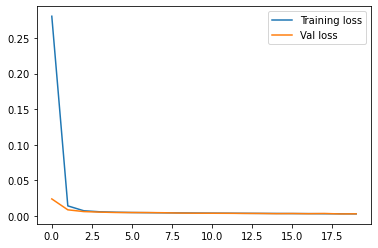

In [55]:
plt.plot(train.history['loss'], label= 'Training loss')
plt.plot(train.history['val_loss'], label= 'Val loss')
plt.legend()

<!-- # 3 layers
![image-8.png](attachment:image-8.png), ![image-7.png](attachment:image-7.png)

# 4 layers
![image-6.png](attachment:image-6.png), ![image-5.png](attachment:image-5.png) -->

In [56]:
test_predictions = model2.predict(X_test).flatten()
y_test = y_test.flatten()

135/135 [==============================] - 2s 3ms/step


In [57]:
print(F"The MAPE value of Press flue gas/92pi300 {mape(y_test,test_predictions)}")
print(F"The Max MAPE value of oxygen% {maxMape(y_test,test_predictions)}")

The MAPE value of Press flue gas/92pi300 0.26763826608657837
The Max MAPE value of oxygen% 133.4169464111328


In [129]:
# display(y_test)
# display(test_predictions)

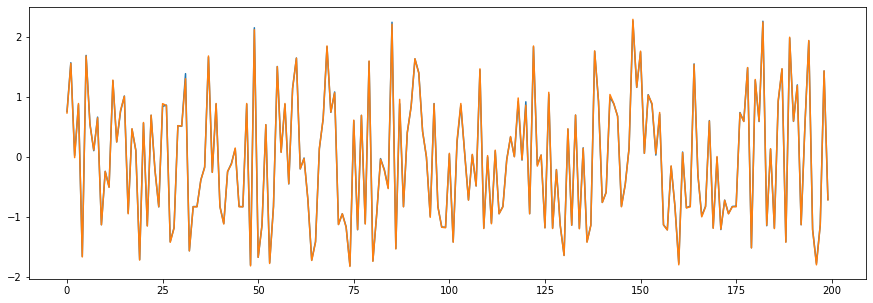

In [130]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(test_predictions[:200])
plt.plot(y_test[:200])

# 3 layers 
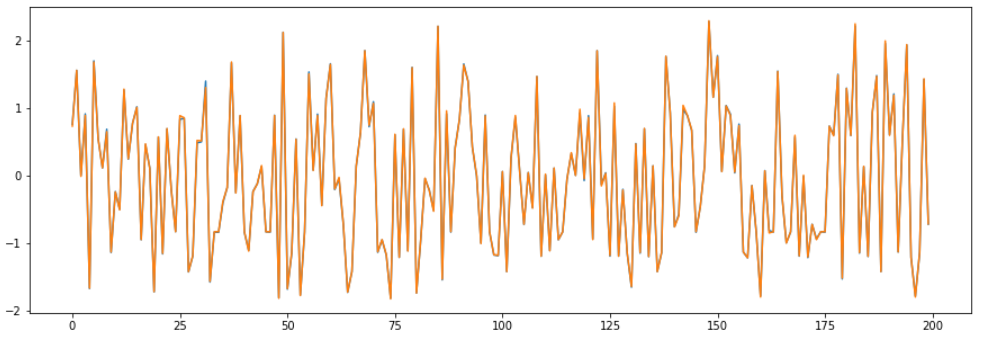

# 4 layers
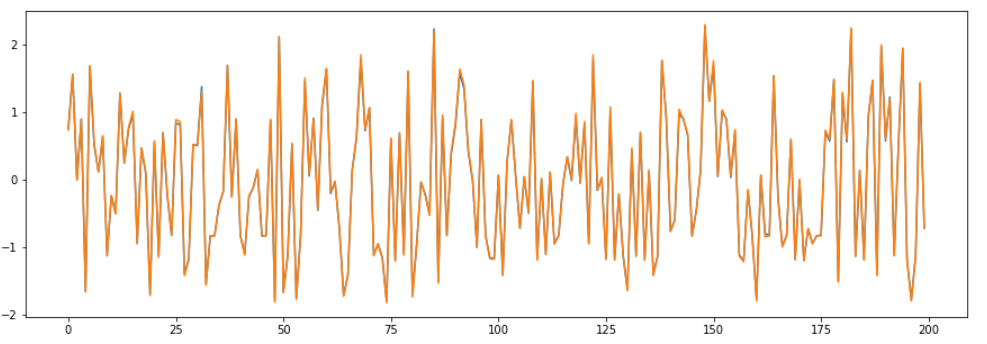

In [131]:
y_inv=np.array([test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions])
y_inv= pd.DataFrame(y_inv.transpose())
y_inv= ss2.inverse_transform(y_inv)[:,0]
y_inv

array([0.3599501 , 0.38616288, 0.3363571 , ..., 0.30912343, 0.34238535,
       0.28421414], dtype=float32)

In [132]:
orig_y= orig_y.to_numpy()

The mean squared error=  5.2668574e-06


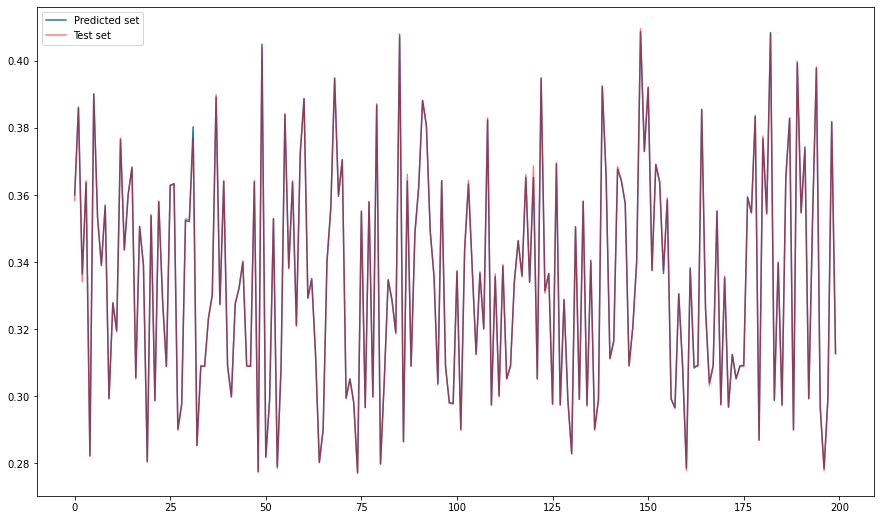

In [133]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(9)
plt.plot(y_inv[:200], label= 'Predicted set')
plt.plot(orig_y[:200],color='r', label= 'Test set', alpha=0.5)
plt.legend()
print('The mean squared error= ',mse(y_inv,orig_y))

# Temp flue gas/92ti300.pv' as single output LSTM Model


In [72]:
# Input output
P3 = dfd.drop(['Time','Flow BFW/92fy300.pv','Press flue gas/92pi300.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv','Press Fuel gas/92pi304.pv'], axis=1)
P3.shape

(21494, 13)

In [73]:
y400= dfd['Temp flue gas/92ti300.pv']
y400= y400.to_numpy()
y400= y400.reshape(-1,1)

In [74]:
ss3 =StandardScaler()
ss4 =StandardScaler()
ss3= ss3.fit(P3)
ss4= ss4.fit(y400)
P3= ss3.transform(P3)
y400=ss4.transform(y400) 
P3 = pd.DataFrame(P3)
P3['13'] = y400
P3= P3.to_numpy()

In [75]:
X2= []
y2= []
n1= 1
n2= 5
for i in range(n2, len(P3)-n1 +1):
    X2.append(P3[i-n2 : i, 0: P3.shape[1]])
    y2.append(P3[i+n1-1:i+n1,13])

In [76]:
X2, y2 =np.array(X2), np.array(y2)
X2.shape , y2.shape

((21489, 5, 14), (21489, 1))

In [77]:
indecies = np.array([i for i in range(21489)])
X_train, X_test, y_train, y_test, indtr,indts = train_test_split(X2,y2,indecies, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [78]:
#Original test set
orig_y= dfd['Temp flue gas/92ti300.pv'].iloc[indts]

In [79]:
model3 = Sequential()
model3.add(InputLayer((5, 14)))
model3.add(LSTM(64))
model3.add(Dense(32, 'relu')) # Activate this cell for 4 Layers model
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                20224     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 8)                 264       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 22,577
Trainable params: 22,577
Non-trainable params: 0
_________________________________________________________________


In [80]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [81]:
train= model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
430/430 [==============================] - 10s 10ms/step - loss: 0.3060 - root_mean_squared_error: 0.5531 - val_loss: 0.0496 - val_root_mean_squared_error: 0.2228
Epoch 2/20
430/430 [==============================] - 3s 6ms/step - loss: 0.0211 - root_mean_squared_error: 0.1453 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0773
Epoch 3/20
430/430 [==============================] - 3s 7ms/step - loss: 0.0040 - root_mean_squared_error: 0.0631 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 4/20
430/430 [==============================] - 3s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0379
Epoch 5/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 9.6761e-04 - val_root_mean_squared_error: 0.0311
Epoch 6/20
430/430 [==============================] - 3s 7ms/step - loss: 9.6002e-04 - root_mean_squared_error: 0.0310 - val_loss: 6.9

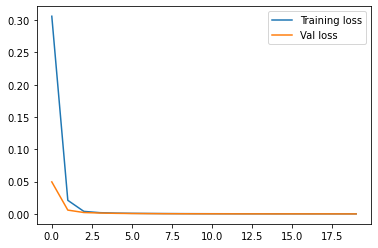

In [82]:
plt.plot(train.history['loss'], label= 'Training loss')
plt.plot(train.history['val_loss'], label= 'Val loss')
plt.legend()

# 3 layers
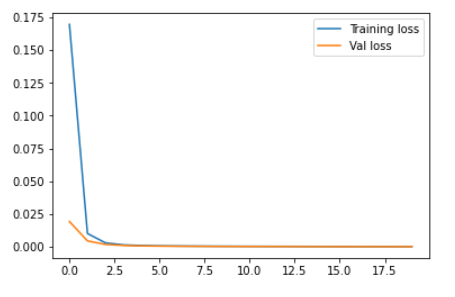, 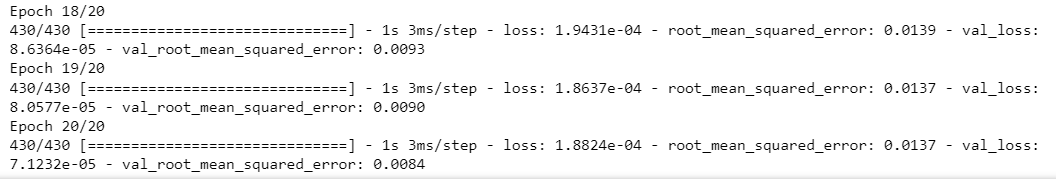

# 4 layers
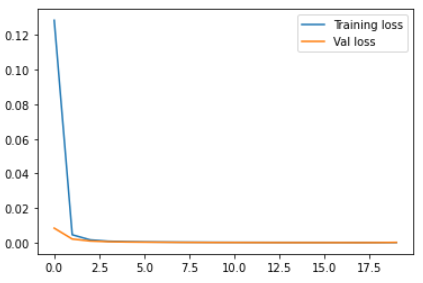, 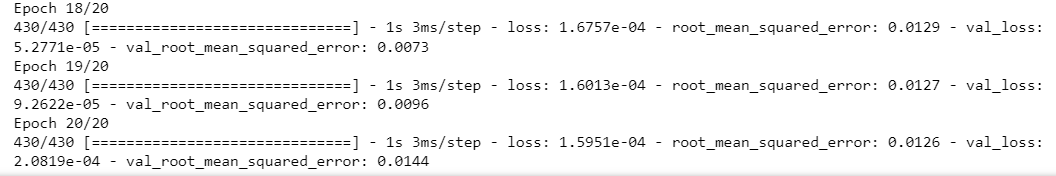

In [83]:
test_predictions = model3.predict(X_test).flatten()
y_test = y_test.flatten()

135/135 [==============================] - 1s 3ms/step


In [84]:
print(F"The MAPE value of Temp flue gas/92ti300 {mape(y_test,test_predictions)}")
print(F"The Max MAPE value of Temp flue gas/92ti300 {maxMape(y_test,test_predictions)}")

The MAPE value of Temp flue gas/92ti300 0.016974810510873795
The Max MAPE value of oxygen% 4.162980556488037


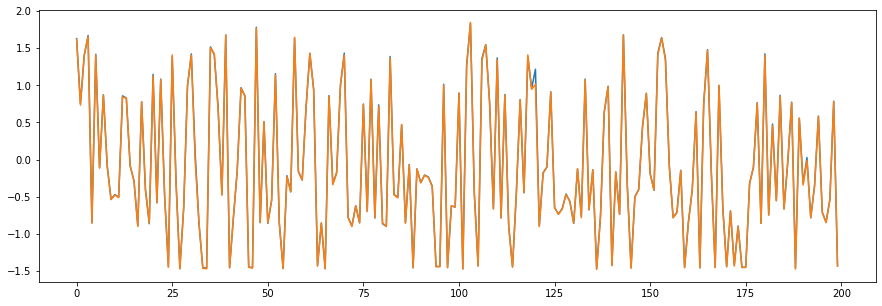

In [147]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(test_predictions[:200])
plt.plot(y_test[:200])

# 3 layers
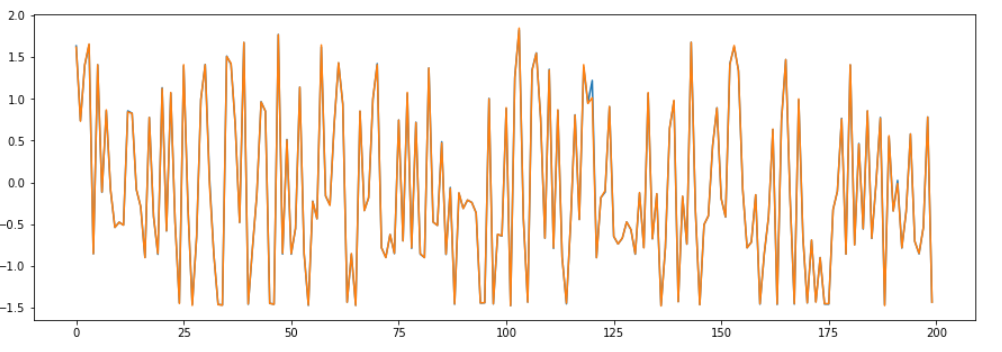

# 4 layers
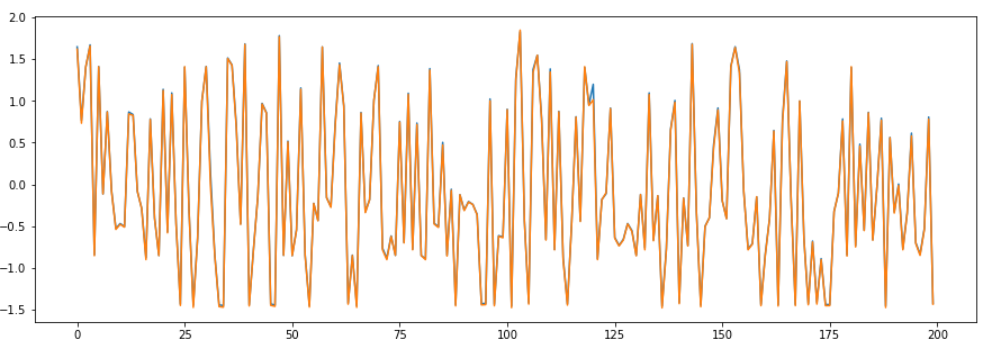

In [148]:
y_inv=np.array([test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions])
y_inv= pd.DataFrame(y_inv.transpose())
y_inv= ss4.inverse_transform(y_inv)[:,0]
y_inv

array([364.2867 , 356.18277, 362.21237, ..., 335.663  , 361.156  ,
       341.28818], dtype=float32)

In [149]:
orig_y= orig_y.to_numpy()


The mean squared error=  0.010760887


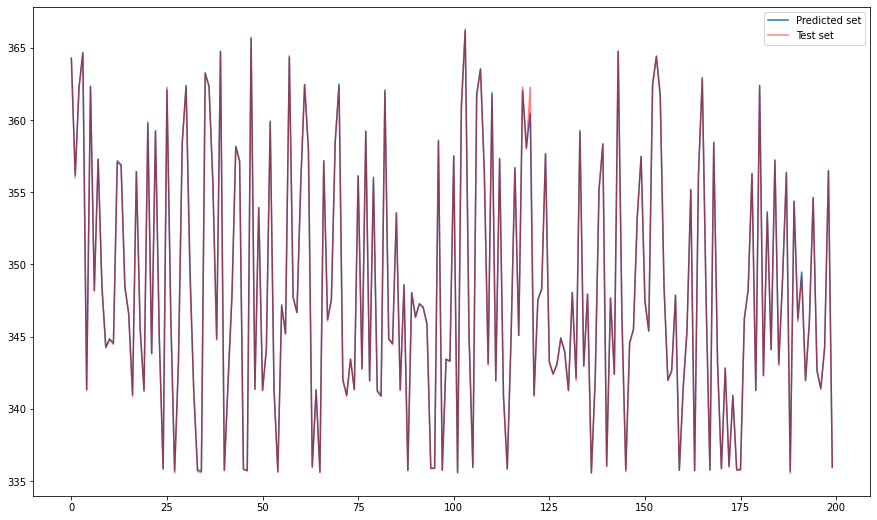

In [150]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(9)
plt.plot(y_inv[:200], label= 'Predicted set')
plt.plot(orig_y[:200],color='r', label= 'Test set', alpha=0.5)
plt.legend()
print('The mean squared error= ',mse(y_inv,orig_y))

# 'oxygen% /92ai300.pv' as single output LSTM Model

In [85]:
P4 = dfd.drop(['Time','Flow BFW/92fy300.pv','Press flue gas/92pi300.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv','Press Fuel gas/92pi304.pv'], axis=1)
P4.shape

(21494, 13)

In [86]:
y500= dfd['oxygen% /92ai300.pv']
y500= y500.to_numpy()
y500= y500.reshape(-1,1)

In [87]:
ss5 =StandardScaler()
ss6 =StandardScaler()
ss5= ss5.fit(P4)
ss6= ss6.fit(y500)
P4= ss5.transform(P4)
y500=ss6.transform(y500) 
P4 = pd.DataFrame(P4)
P4['13'] = y500
P4= P4.to_numpy()

In [88]:
X3= []
y3= []
n1= 1
n2= 5
for i in range(n2, len(P4)-n1 +1):
    X3.append(P4[i-n2 : i, 0: P4.shape[1]])
    y3.append(P4[i+n1-1:i+n1,13])

In [89]:
X3, y3 =np.array(X3), np.array(y3)
X3.shape , y3.shape

((21489, 5, 14), (21489, 1))

In [90]:
indecies = np.array([i for i in range(21489)])
X_train, X_test, y_train, y_test, indtr,indts = train_test_split(X3,y3,indecies, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [91]:
orig_y= dfd['oxygen% /92ai300.pv'].iloc[indts]

In [158]:
model4 = Sequential()
model4.add(InputLayer((5, 14)))
model4.add(LSTM(64))
# model4.add(Dense(32, 'relu'))  # Activate this cell for 4 Layers model
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                20224     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 20,753
Trainable params: 20,753
Non-trainable params: 0
_________________________________________________________________


In [159]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [160]:
train= model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
430/430 [==============================] - 6s 7ms/step - loss: 0.6740 - root_mean_squared_error: 0.8210 - val_loss: 0.2927 - val_root_mean_squared_error: 0.5410
Epoch 2/20
430/430 [==============================] - 2s 5ms/step - loss: 0.1451 - root_mean_squared_error: 0.3809 - val_loss: 0.0746 - val_root_mean_squared_error: 0.2732
Epoch 3/20
430/430 [==============================] - 2s 6ms/step - loss: 0.0464 - root_mean_squared_error: 0.2153 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1745
Epoch 4/20
430/430 [==============================] - 3s 6ms/step - loss: 0.0216 - root_mean_squared_error: 0.1470 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1292
Epoch 5/20
430/430 [==============================] - 2s 6ms/step - loss: 0.0141 - root_mean_squared_error: 0.1187 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1151
Epoch 6/20
430/430 [==============================] - 2s 5ms/step - loss: 0.0120 - root_mean_squared_error: 0.1094 - val_loss: 0.0118 - val_

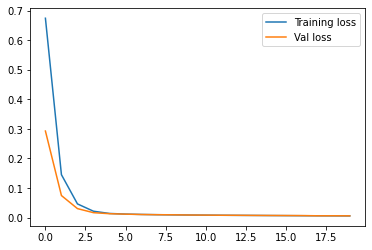

In [161]:
plt.plot(train.history['loss'], label= 'Training loss')
plt.plot(train.history['val_loss'], label= 'Val loss')
plt.legend()

# 3 layers
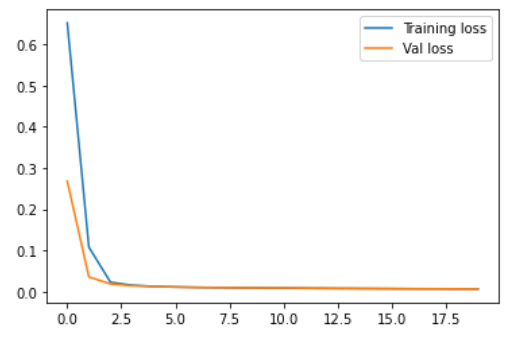, 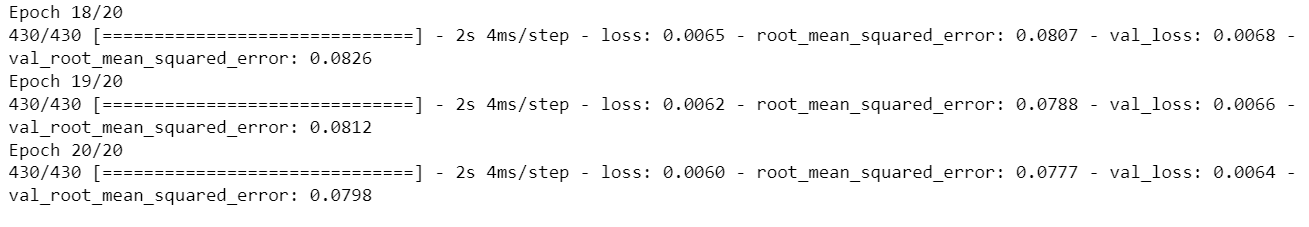

# 4 layers
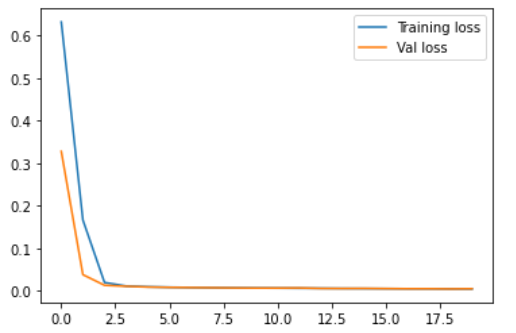, 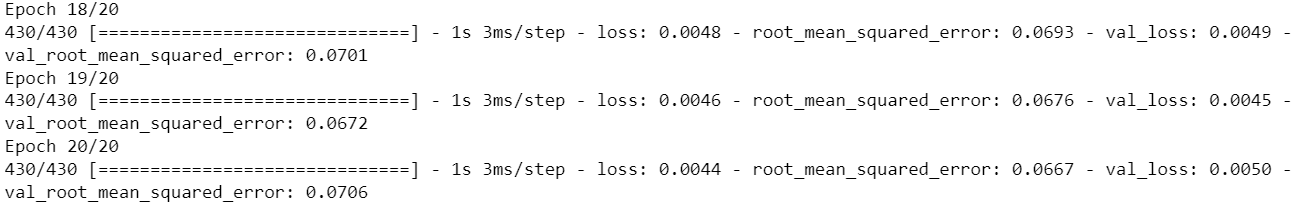

In [162]:
test_predictions = model4.predict(X_test).flatten()
y_test = y_test.flatten()

135/135 [==============================] - 1s 2ms/step


In [163]:
print(F"The MAPE value of oxygen% {mape(y_test,test_predictions)}")
print(F"The Max MAPE value of oxygen% {maxMape(y_test,test_predictions)}")

The MAPE value of oxygen% 0.6958528161048889
The Max MAPE value of oxygen% 322.67645263671875


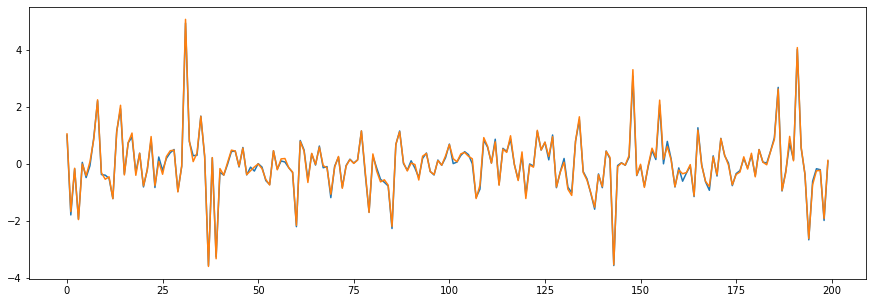

In [164]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(test_predictions[:200])
plt.plot(y_test[:200])

# 3 layers
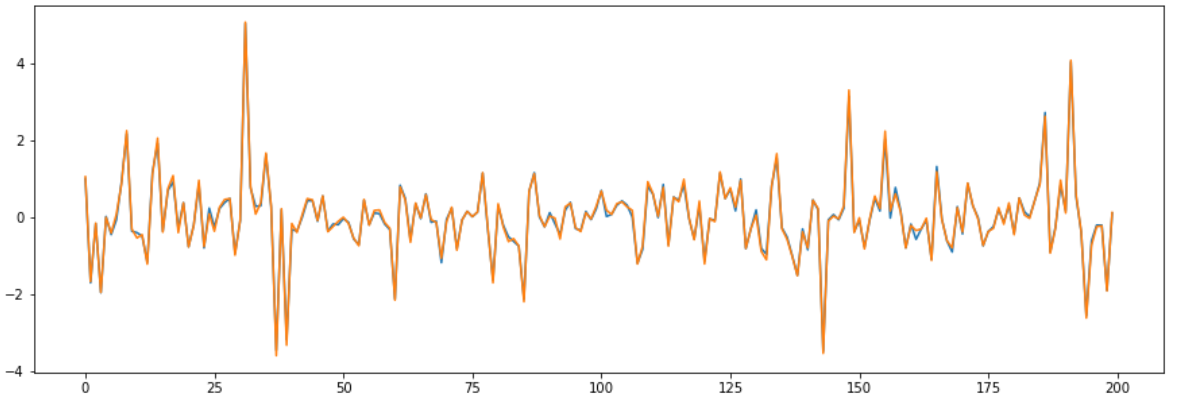

# 4 layers
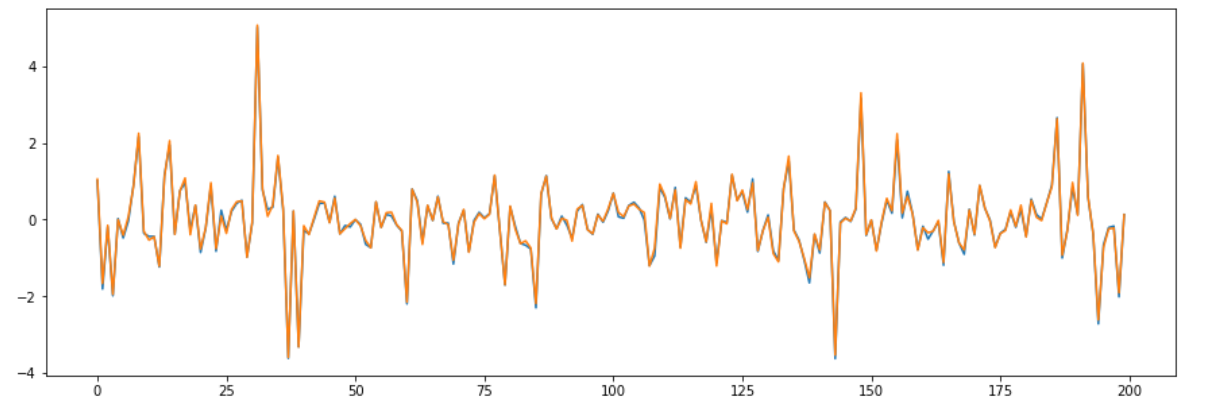

In [165]:
y_inv=np.array([test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions])
y_inv= pd.DataFrame(y_inv.transpose())
y_inv= ss6.inverse_transform(y_inv)[:,0]
y_inv

array([2.16028  , 1.7046521, 1.9681373, ..., 1.8521949, 2.0569842,
       2.1342597], dtype=float32)

In [166]:
orig_y= orig_y.to_numpy()

The mean squared error=  0.00041490796


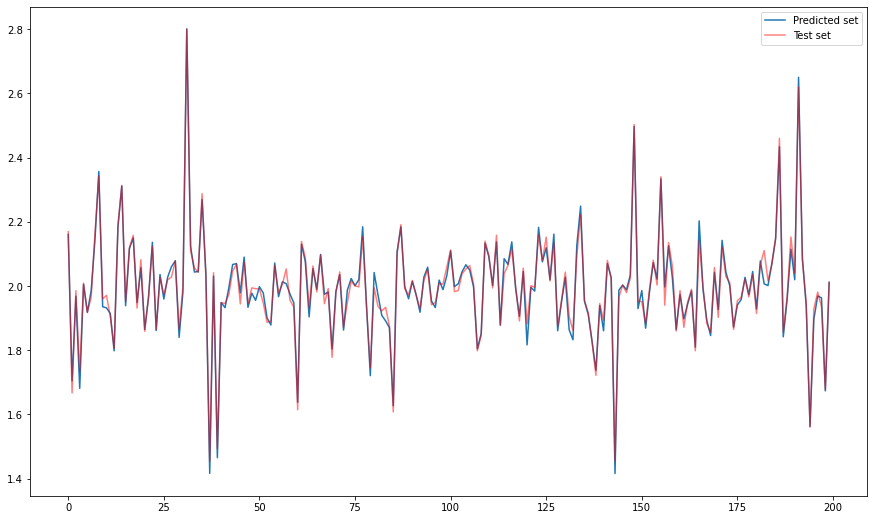

In [167]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(9)
plt.plot(y_inv[:200], label= 'Predicted set')
plt.plot(orig_y[:200],color='r', label= 'Test set', alpha=0.5)
plt.legend()
print('The mean squared error= ',mse(y_inv,orig_y))

In [168]:
# display(train.history)